数据预处理
数据质量：缺失值处理、异常处理、重复数据
数据结构：格式转化、数据合并
1. 删除重复数据，并输出去重前后的数据量

In [2]:
import pandas as pd
raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]

print("去重前数据量：",len(data))
data_unique = data.drop_duplicates()
print("去重后数据量：",len(data_unique))

去重前数据量： 20358
去重后数据量： 19779


2. 缺失值处理
首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
最后，再次看各列有无缺失值

In [ ]:
# 去掉gravatar_id列
data = data.drop('gravatar_id', axis=1)

# 查看各列的缺失值情况
print("第一次查看各列缺失值情况：")
print(data.isnull().sum())

# 将可转化成boolean变量的列字段转化成boolean变量
boolean_columns = ['site_admin', 'hireable']
for col in boolean_columns:
    data[col] = data[col].astype('bool')

# 用空字符串填充文本数据的空值
text_columns = ['name', 'company', 'blog', 'location', 'email', 'bio', 'twitter_username']
for col in text_columns:
    data[col] = data[col].fillna('')

# 再次看各列有无缺失值
print("第二次查看各列缺失值情况：")
print(data.isnull().sum())

第一次查看各列缺失值情况：
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2654
company                 9229
blog                   11601
location                7287
email                  12079
hireable               16956
bio                    11262
twitter_username       15297
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64
第二次查看各列缺失值情况：
ac

3.数据变换，将created_at、updated_at转为时间戳

In [4]:
import time

data['created_at'] = data['created_at'].apply(lambda x: time.mktime(pd.to_datetime(x).timetuple()))
data['updated_at'] = data['updated_at'].apply(lambda x: time.mktime(pd.to_datetime(x).timetuple()))

4.数据可视化
4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

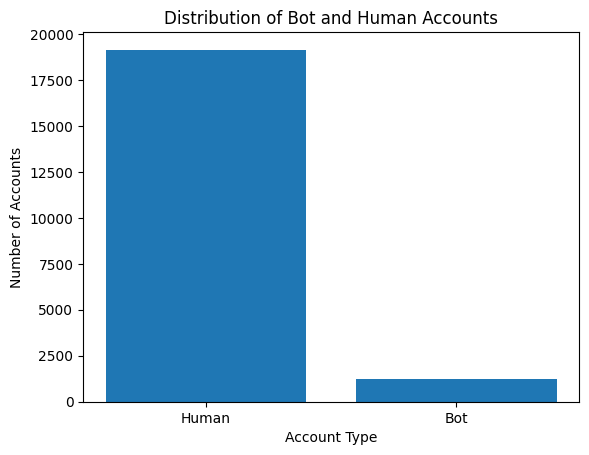

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
type_count = data['label'].value_counts()

# 使用柱状图进行可视化
plt.bar(type_count.index, type_count.values)
plt.xlabel('Account Type')
plt.ylabel('Number of Accounts')
plt.title('Distribution of Bot and Human Accounts')
plt.show()

4.1:  选择原因：柱状图能够清晰直观地展示不同类别之间的数量对比关系。通过柱子的高度，我们可以很容易地看出哪种类型的账号数量更多。
结果分析：从绘制出的柱状图中，我们可以直接观察到 bot 类型和 human 类型账号的数量分布情况。human类型账号远远多于bot类型账号。
数据洞察：通过这种可视化方式，我们可以快速了解到数据集中 bot 和 human 类型账号的大致构成比例，这对于进一步分析两种类型账号的行为、特征等方面的差异具有重要的基础作用。

C:\Users\86188\AppData\Local\Temp\ipykernel_25264\1738046082.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_data['created_at'] = pd.to_datetime(bot_data['created_at'], unit='s')


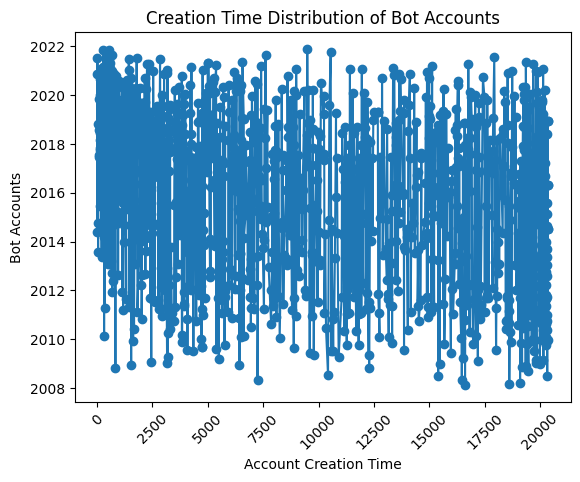

In [7]:
# 提取bot类型账号的数据
bot_data = data[data['label'] == 'Bot']

bot_data['created_at'] = pd.to_datetime(bot_data['created_at'], unit='s')

# 使用折线图可视化bot类型账号的created_at随时间的分布情况
plt.plot(bot_data['created_at'], marker='o')
plt.xlabel('Account Creation Time')
plt.ylabel('Bot Accounts')
plt.title('Creation Time Distribution of Bot Accounts')
plt.xticks(rotation=45)
plt.show()

4.2：选择原因：折线图适合展示数据随时间的变化趋势。在这里，我们想要观察 bot 类型账号的创建时间分布情况，折线图可以清晰地呈现出随着时间推移，bot 账号创建数量的大致变化趋势。
结果分析：从折线图中，我们可以看到 bot 账号创建时间的集中区域以及是否存在某些时间段内创建的 bot 账号数量较多或较少的情况。
数据洞察：通过这种可视化方式，我们可以了解到 bot 账号创建时间的规律。这对于探究 bot 账号的发展趋势、是否存在集中爆发创建的时期等方面具有重要意义。

C:\Users\86188\AppData\Local\Temp\ipykernel_25264\2703406070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_data['created_at'] = pd.to_datetime(human_data['created_at'], unit='s')


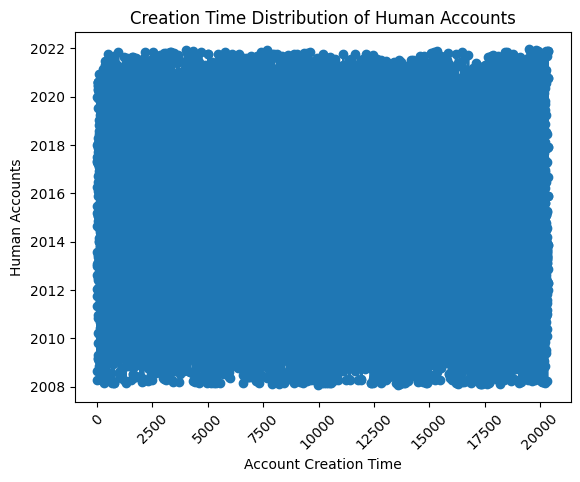

In [8]:
# 提取human类型账号的数据
human_data = data[data['label'] == 'Human']

human_data['created_at'] = pd.to_datetime(human_data['created_at'], unit='s')

# 使用折线图可视化human类型账号的created_at随时间的分布情况
plt.plot(human_data['created_at'], marker='o')
plt.xlabel('Account Creation Time')
plt.ylabel('Human Accounts')
plt.title('Creation Time Distribution of Human Accounts')
plt.xticks(rotation=45)
plt.show()

4.3：选择原因：同 4.2 一样，折线图适合展示数据随时间的变化趋势。对于 human 类型账号的创建时间分布情况，折线图能够清晰地呈现出随着时间推移，human 账号创建数量的大致变化趋势。
结果分析：从折线图中，我们可以看到 human 账号创建时间的集中区域以及是否存在某些时间段内创建的 human 账号数量较多或较少的情况。
数据洞察：通过这种可视化方式，我们可以了解到 human 账号创建时间的规律。这对于探究 human 账号的发展趋势、是否存在集中爆发创建的时期等方面具有重要意义。

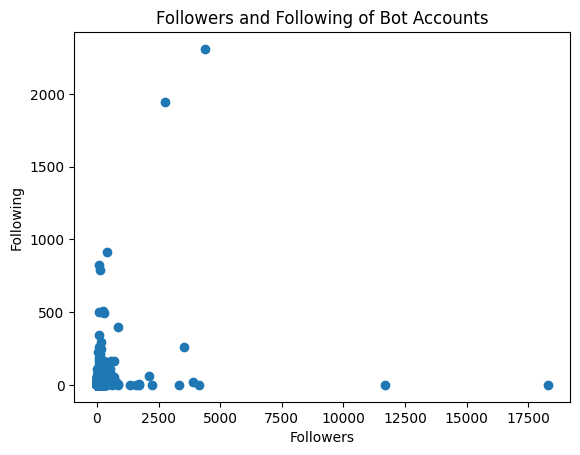

In [9]:
# 提取bot类型账号的数据
bot_data = data[data['label'] == 'Bot']

# 使用散点图可视化bot类型账号的followers和following情况
plt.scatter(bot_data['followers'], bot_data['following'])
plt.xlabel('Followers')
plt.ylabel('Following')
plt.title('Followers and Following of Bot Accounts')
plt.show()

4.4：选择原因：散点图主要用于展示两个变量之间的关系。在这里，我们想要观察 bot 类型账号的 followers 数量和 following 数量之间的关系，散点图可以直观地呈现出它们之间是否存在某种关联，比如是否存在正相关、负相关或者无明显关系等情况。
结果分析：从散点图中，我们可以看到 bot 账号的 followers 和 following 数量的分布呈负相关。
数据洞察：通过这种可视化方式，我们可以了解到 bot 账号在社交互动方面的特点。

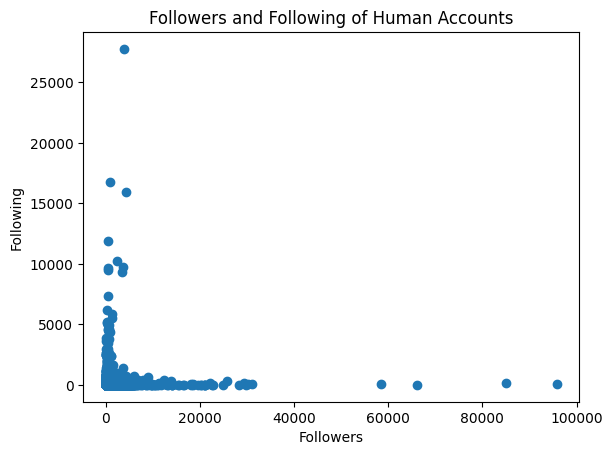

In [10]:
# 提取human类型账号的数据
human_data = data[data['label'] == 'Human']

# 使用散点图可视化human类型账号的followers和following情况
plt.scatter(human_data['followers'], human_data['following'])
plt.xlabel('Followers')
plt.ylabel('Following')
plt.title('Followers and Following of Human Accounts')
plt.show()

4.5：选择原因：同 4.4 一样，散点图主要用于展示两个变量之间的关系。对于 human 类型账号的 followers 数量和 following 数量之间的关系，散点图可以直观地呈现出它们之间是否存在某种关联，比如是否存在正相关、负相关或者无明显关系等情况。
结果分析：从散点图中，我们可以看到 human 账号的 followers 和 following 数量关系呈负相关，并且比bot账号的负相关更加明显。
数据洞察：通过这种可视化方式，我们可以了解到 human 账号在社交互动方面的特点。